# Assignment CSC 369 2.0 Machine learning

# importing all required libraries

import sutable libraries for 
> **pandas** :* for convert dataset into required format*,<br>
> **sklearn** :* for perform K-nearest neighbors algorithm*,<br>
> **nampy** : *for special math function*,<br>
> **keras** : *for perform reggression and nural networks*

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from pylab import rcParams

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score

#### import keras libraries

In [37]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

## Loard the dataset

In [243]:
cns = pd.read_csv('Adult_Census_Income_Binary_Classification_dataset.csv')


### Handle missing data

- convert imssing data from given format'?' into NAN
- Then drop those missing data to make complete dataset
- remake the **DataFrme** to avoiding missing indexes

In [244]:
#Function convert imssing data in given format'?' in to NAN and then drop those data

def remove_miss_data(df):
    df = df.replace('[?]',np.nan,regex=True)
    df = df.dropna(how='any')
    return df

In [40]:
# assign th function
cns = remove_miss_data(cns)

In [41]:
#Reorganizing data frame with continueus Indexes
cns = pd.DataFrame(cns.values,columns= cns.columns.values)

In [42]:
#output of the convert
cns.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [43]:
##test

## Convert all non-numeric Data into numeric

> This census dataset has lot of **featurs with non numeric format** <br>
> But the problem is we *can't handle those data in machine learning contex *.<br>
> There for we hv to convert those data into numeric format

In [44]:
#function is converting all categorical data into nomeric format

def handle_non_numeric_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_val ={} #use this variable to hold categories of each columns and there lables given by us
        def convert_to_int(value):
            return text_digit_val[value]
        if df[column].dtype != np.int64 or df[column].dtype != np.float64:
            column_content = df[column].values.tolist()
            unique_element = set(column_content)
            
            x=0
            for unique in unique_element:
                if unique not in text_digit_val:
                    text_digit_val[unique] = x
                    x+=1
            
            df[column] = list(map(convert_to_int,df[column]))
    
    return df


In [45]:
#execute the function
cns = handle_non_numeric_data(cns)

In [46]:
#output of the function
cns.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,4,7,12,6,3,2,2,1,29,0,39,36,0
1,33,2,7,12,1,9,5,2,1,0,0,12,36,0
2,21,6,6,8,4,4,2,2,1,0,0,39,36,0
3,36,6,11,6,1,4,5,4,1,0,0,39,36,0
4,11,6,7,12,1,1,1,4,0,0,0,39,21,0


## Spliting the dataset into the train and test

In [47]:
x_prime = cns.iloc[:,:13].values
y = cns.iloc[:,13].values

In [48]:
print("x_prime dataType: "+str(x_prime.dtype))
print("y dataType: "+str(y.dtype))

x_prime dataType: int64
y dataType: int64


#### Normalizing the input data

In [49]:
x_prime = x_prime.astype('float64') #converting data type into float64

X = preprocessing.scale(x_prime)

#### split  y and x into train and test
> gives **70%** of **train data**,  and **30%** of **test data**

In [50]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.33)

# 1. K Nearest Neighbour Classification 

##### 1.  initialzing the KNN I

In [44]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 5)

##### 2. fit training data for train the model I

In [45]:
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

##### 3. evaluate the model performance at K=5

In [46]:
y_expect = y_test
y_predict = clf.predict(x_test)

print(metrics.classification_report(y_expect,y_predict))

             precision    recall  f1-score   support

          0       0.67      0.58      0.62      2503
          1       0.86      0.90      0.88      7451

avg / total       0.81      0.82      0.82      9954



In [47]:
accuracy_score(y_predict,y_expect)

0.8217801888687964

##### 4. find optimum K value for the model

In [48]:
rangeList = list(range(1,50))
neighbors = filter(lambda x: x%2!=0,rangeList)

In [49]:
cv_scores =[]
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,x_train,y_train ,cv =10,scoring='accuracy')
    cv_scores.append(scores.mean())

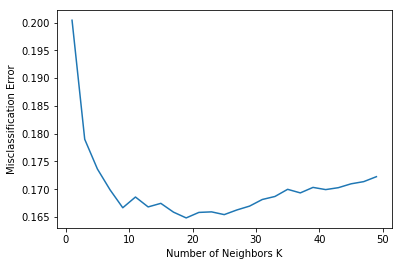

In [57]:
rangeList = list(range(1,50))
neighbors = filter(lambda x: x%2!=0,rangeList)
MSE = [1 - x for x in cv_scores]
MSE1 = MSE #assign MSE 
MSE = np.array(MSE).astype('float64')
neighbors = np.array(list(neighbors)).astype('float64')

plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


#### Find optimum k value

In [140]:
optimum_k = neighbors[MSE1.index(min(MSE1))]
print('Optimum K:'+str(optimum_k))

Optimum K:19.0


#### Find the KNN algorithm with optimum k

In [259]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')

In [260]:
y_predict = knn.predict(x_test)
y_expect = y_test

##### Precision ann recall

In [147]:
print(metrics.classification_report(y_expect,y_predict))

             precision    recall  f1-score   support

          0       0.70      0.57      0.63      2465
          1       0.87      0.92      0.89      7489

avg / total       0.83      0.83      0.83      9954



##### More precision + low recall is for good Predictor

#### predictor accuracy level

In [261]:
accuracy_score(y_predict, y_expect)

0.8426763110307414

In [262]:
#this model has good accuracy level

# 2. Logistic Regression

In [51]:
#split into test and validation
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size=.5)

In [52]:
#convert to the one hot encording format
y_val_one_hot = keras.utils.to_categorical(y_val,num_classes = 2)
y_train_one_hot = keras.utils.to_categorical(y_train,num_classes =2)
y_test_one_hot = keras.utils.to_categorical(y_test,num_classes = 2)

In [179]:
#crate the model
epochs = 100
batch_size = 110

model = Sequential()
model.add(Dense(2,input_dim = (13),activation='softmax'))
model.compile(optimizer= 'sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [180]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 2)                 28        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [246]:
#train the model
history=model.fit(x_train,y_train_one_hot, validation_data=(x_val, y_val_one_hot), batch_size=85,epochs=epochs)

Train on 20208 samples, validate on 4977 samples
Epoch 1/100
20208/20208 [==============================] - 0s 20us/step - loss: 0.3738 - acc: 0.8216 - val_loss: 0.3812 - val_acc: 0.8176
Epoch 2/100
20208/20208 [==============================] - 0s 17us/step - loss: 0.3738 - acc: 0.8211 - val_loss: 0.3812 - val_acc: 0.8180
Epoch 3/100
20208/20208 [==============================] - 0s 18us/step - loss: 0.3738 - acc: 0.8209 - val_loss: 0.3814 - val_acc: 0.8178
Epoch 4/100
20208/20208 [==============================] - 0s 21us/step - loss: 0.3738 - acc: 0.8213 - val_loss: 0.3813 - val_acc: 0.8180
Epoch 5/100
20208/20208 [==============================] - 0s 19us/step - loss: 0.3738 - acc: 0.8214 - val_loss: 0.3812 - val_acc: 0.8178
Epoch 6/100
20208/20208 [==============================] - 0s 18us/step - loss: 0.3738 - acc: 0.8209 - val_loss: 0.3812 - val_acc: 0.8176
Epoch 7/100
20208/20208 [==============================] - 0s 18us/step - loss: 0.3738 - acc: 0.8211 - val_loss: 0.3812 - v

20208/20208 [==============================] - 0s 21us/step - loss: 0.3738 - acc: 0.8212 - val_loss: 0.3812 - val_acc: 0.8178
Epoch 60/100
20208/20208 [==============================] - 0s 19us/step - loss: 0.3738 - acc: 0.8214 - val_loss: 0.3812 - val_acc: 0.8178
Epoch 61/100
20208/20208 [==============================] - 0s 19us/step - loss: 0.3738 - acc: 0.8209 - val_loss: 0.3812 - val_acc: 0.8178
Epoch 62/100
20208/20208 [==============================] - 0s 20us/step - loss: 0.3738 - acc: 0.8217 - val_loss: 0.3811 - val_acc: 0.8182
Epoch 63/100
20208/20208 [==============================] - 0s 19us/step - loss: 0.3738 - acc: 0.8213 - val_loss: 0.3812 - val_acc: 0.8180
Epoch 64/100
20208/20208 [==============================] - 0s 20us/step - loss: 0.3738 - acc: 0.8211 - val_loss: 0.3813 - val_acc: 0.8182
Epoch 65/100
20208/20208 [==============================] - 0s 20us/step - loss: 0.3738 - acc: 0.8210 - val_loss: 0.3812 - val_acc: 0.8180
Epoch 66/100
20208/20208 [==============

##### model accuracy

In [247]:
evaluate = model.evaluate(x_test,y_test_one_hot,verbose=1)

4977/4977 [==============================] - 0s 22us/step


In [248]:
#calculating model accuracy rate
print('Model Loss Rate: ' +str(evaluate[0]))
print('Model accuracy Rate: ' +str(evaluate[1]))

Model Loss Rate: 0.35983706767333423
Model accuracy Rate: 0.8241912799713146


In [249]:
y_predict = model.predict(x_test)
y_expect = y_test_one_hot

In [250]:
y_predict

array([[0.9867041 , 0.01329593],
       [0.9899102 , 0.01008975],
       [0.7215466 , 0.2784534 ],
       ...,
       [0.70447224, 0.2955278 ],
       [0.9432098 , 0.05679019],
       [0.9348823 , 0.06511771]], dtype=float32)

In [251]:
y_expect

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [252]:
target_names = ['0','1']

In [253]:
y_predicted = []
for x in y_predict:
    if x[0] > 0.5:
        y_predicted.append(0)
    else:
        y_predicted.append(1)

##### Precission And Recall

In [254]:
print(metrics.classification_report(y_test, y_predicted, target_names=target_names, digits = 2))

             precision    recall  f1-score   support

          0       0.85      0.93      0.89      3709
          1       0.71      0.53      0.60      1268

avg / total       0.81      0.82      0.82      4977



- precision = TP/(TP+FP) <br>
- recall = TP/(P)<br>
> where TP = "** True Postive**" , FP = "**False Positive**", P = "**total positive**" 

- here high total recall and precision values says that model is predict most of the time correctly

### Check model  over fitting

#### Plot Loss of training and validation data

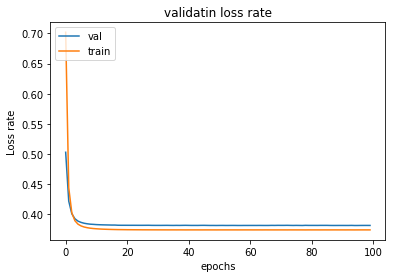

In [199]:

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title("validatin loss rate")
plt.ylabel('Loss rate')
plt.xlabel('epochs')
plt.legend(['val','train'],loc='upper left')
plt.show()

#### plot accuracy of training and validation set

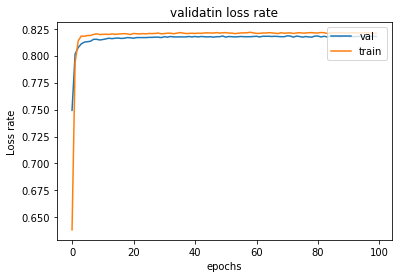

In [197]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title("validatin loss rate")
plt.ylabel('Loss rate')
plt.xlabel('epochs')
plt.legend(['val','train'],loc='upper right')
plt.show()

### conclution of logistic regression
- no any overfitting detected
- accuracy rate is :  0.8245931284744289

# 3. Neural Network

In [157]:
batch_size = 85
epochs = 500

#num of neurons in  Each layer
layer_1 = 13
layer_2 = 32
layer_3 = 32
layer_4 = 2

In [158]:
#this nural network is also used above one hot encoded values
modelN = Sequential()
modelN.add(Dense(layer_2,input_dim=layer_1,activation='relu'))#hidden layer
modelN.add(Dense(layer_3,input_dim=layer_2,activation='relu'))#hidden layer
modelN.add(Dense(layer_4,input_dim = layer_3,activation = 'softmax'))#output layer
modelN.compile(optimizer='sgd',loss='binary_crossentropy',metrics = ['accuracy'])

In [159]:
modelN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_39 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_40 (Dense)             (None, 2)                 66        
Total params: 1,570
Trainable params: 1,570
Non-trainable params: 0
_________________________________________________________________


In [160]:
history = modelN.fit(x_train,y_train_one_hot,batch_size=batch_size,epochs=epochs,validation_data=(x_val, y_val_one_hot))
#y_train_one_hot
#x_train

Train on 20208 samples, validate on 4977 samples
Epoch 1/500
20208/20208 [==============================] - 1s 41us/step - loss: 0.5818 - acc: 0.6953 - val_loss: 0.4771 - val_acc: 0.7593
Epoch 2/500
20208/20208 [==============================] - 0s 19us/step - loss: 0.4314 - acc: 0.7987 - val_loss: 0.4112 - val_acc: 0.8121
Epoch 3/500
20208/20208 [==============================] - 0s 19us/step - loss: 0.3938 - acc: 0.8177 - val_loss: 0.3925 - val_acc: 0.8154
Epoch 4/500
20208/20208 [==============================] - 0s 18us/step - loss: 0.3813 - acc: 0.8197 - val_loss: 0.3857 - val_acc: 0.8164
Epoch 5/500
20208/20208 [==============================] - 0s 20us/step - loss: 0.3750 - acc: 0.8212 - val_loss: 0.3810 - val_acc: 0.8178
Epoch 6/500
20208/20208 [==============================] - 0s 21us/step - loss: 0.3707 - acc: 0.8242 - val_loss: 0.3776 - val_acc: 0.8204
Epoch 7/500
20208/20208 [==============================] - 0s 21us/step - loss: 0.3675 - acc: 0.8269 - val_loss: 0.3752 - v

20208/20208 [==============================] - 0s 16us/step - loss: 0.3348 - acc: 0.8438 - val_loss: 0.3487 - val_acc: 0.8340
Epoch 60/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3345 - acc: 0.8445 - val_loss: 0.3486 - val_acc: 0.8356
Epoch 61/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3342 - acc: 0.8450 - val_loss: 0.3488 - val_acc: 0.8360
Epoch 62/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3341 - acc: 0.8448 - val_loss: 0.3480 - val_acc: 0.8308
Epoch 63/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3338 - acc: 0.8437 - val_loss: 0.3483 - val_acc: 0.8342
Epoch 64/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3336 - acc: 0.8446 - val_loss: 0.3485 - val_acc: 0.8350
Epoch 65/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3333 - acc: 0.8454 - val_loss: 0.3478 - val_acc: 0.8342
Epoch 66/500
20208/20208 [==============

Epoch 118/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3236 - acc: 0.8503 - val_loss: 0.3433 - val_acc: 0.8403
Epoch 119/500
20208/20208 [==============================] - 0s 15us/step - loss: 0.3235 - acc: 0.8506 - val_loss: 0.3427 - val_acc: 0.8405
Epoch 120/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3233 - acc: 0.8510 - val_loss: 0.3428 - val_acc: 0.8397
Epoch 121/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3233 - acc: 0.8499 - val_loss: 0.3433 - val_acc: 0.8413
Epoch 122/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3231 - acc: 0.8502 - val_loss: 0.3432 - val_acc: 0.8399
Epoch 123/500
20208/20208 [==============================] - 0s 15us/step - loss: 0.3231 - acc: 0.8505 - val_loss: 0.3427 - val_acc: 0.8413
Epoch 124/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3229 - acc: 0.8503 - val_loss: 0.3434 - val_acc: 0.8397
Epoch 125/500
20208/

20208/20208 [==============================] - 0s 16us/step - loss: 0.3173 - acc: 0.8539 - val_loss: 0.3405 - val_acc: 0.8431
Epoch 177/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3172 - acc: 0.8531 - val_loss: 0.3411 - val_acc: 0.8419
Epoch 178/500
20208/20208 [==============================] - 0s 15us/step - loss: 0.3170 - acc: 0.8536 - val_loss: 0.3412 - val_acc: 0.8437
Epoch 179/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3171 - acc: 0.8540 - val_loss: 0.3410 - val_acc: 0.8429
Epoch 180/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3169 - acc: 0.8541 - val_loss: 0.3404 - val_acc: 0.8435
Epoch 181/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3170 - acc: 0.8531 - val_loss: 0.3432 - val_acc: 0.8391
Epoch 182/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3167 - acc: 0.8547 - val_loss: 0.3406 - val_acc: 0.8415
Epoch 183/500
20208/20208 [=======

20208/20208 [==============================] - 0s 16us/step - loss: 0.3129 - acc: 0.8552 - val_loss: 0.3401 - val_acc: 0.8427
Epoch 235/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3127 - acc: 0.8564 - val_loss: 0.3404 - val_acc: 0.8435
Epoch 236/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3127 - acc: 0.8554 - val_loss: 0.3401 - val_acc: 0.8449
Epoch 237/500
20208/20208 [==============================] - 0s 18us/step - loss: 0.3127 - acc: 0.8565 - val_loss: 0.3400 - val_acc: 0.8449
Epoch 238/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3125 - acc: 0.8560 - val_loss: 0.3400 - val_acc: 0.8471
Epoch 239/500
20208/20208 [==============================] - 0s 15us/step - loss: 0.3122 - acc: 0.8553 - val_loss: 0.3407 - val_acc: 0.8453
Epoch 240/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3124 - acc: 0.8559 - val_loss: 0.3423 - val_acc: 0.8441
Epoch 241/500
20208/20208 [=======

20208/20208 [==============================] - 0s 22us/step - loss: 0.3096 - acc: 0.8582 - val_loss: 0.3382 - val_acc: 0.8461
Epoch 293/500
20208/20208 [==============================] - 0s 23us/step - loss: 0.3093 - acc: 0.8581 - val_loss: 0.3394 - val_acc: 0.8461
Epoch 294/500
20208/20208 [==============================] - 0s 22us/step - loss: 0.3093 - acc: 0.8573 - val_loss: 0.3397 - val_acc: 0.8451
Epoch 295/500
20208/20208 [==============================] - 0s 18us/step - loss: 0.3090 - acc: 0.8579 - val_loss: 0.3388 - val_acc: 0.8491
Epoch 296/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3090 - acc: 0.8579 - val_loss: 0.3387 - val_acc: 0.8473
Epoch 297/500
20208/20208 [==============================] - 0s 19us/step - loss: 0.3088 - acc: 0.8584 - val_loss: 0.3390 - val_acc: 0.8485
Epoch 298/500
20208/20208 [==============================] - 0s 17us/step - loss: 0.3088 - acc: 0.8578 - val_loss: 0.3393 - val_acc: 0.8453
Epoch 299/500
20208/20208 [=======

20208/20208 [==============================] - 0s 16us/step - loss: 0.3062 - acc: 0.8581 - val_loss: 0.3396 - val_acc: 0.8479
Epoch 351/500
20208/20208 [==============================] - 0s 19us/step - loss: 0.3059 - acc: 0.8596 - val_loss: 0.3402 - val_acc: 0.8455
Epoch 352/500
20208/20208 [==============================] - 0s 17us/step - loss: 0.3059 - acc: 0.8603 - val_loss: 0.3442 - val_acc: 0.8403
Epoch 353/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3061 - acc: 0.8586 - val_loss: 0.3398 - val_acc: 0.8477
Epoch 354/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3056 - acc: 0.8608 - val_loss: 0.3410 - val_acc: 0.8447
Epoch 355/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3057 - acc: 0.8586 - val_loss: 0.3421 - val_acc: 0.8433
Epoch 356/500
20208/20208 [==============================] - 0s 16us/step - loss: 0.3060 - acc: 0.8600 - val_loss: 0.3397 - val_acc: 0.8465
Epoch 357/500
20208/20208 [=======

20208/20208 [==============================] - 0s 20us/step - loss: 0.3036 - acc: 0.8602 - val_loss: 0.3396 - val_acc: 0.8467
Epoch 409/500
20208/20208 [==============================] - 0s 24us/step - loss: 0.3033 - acc: 0.8596 - val_loss: 0.3397 - val_acc: 0.8451
Epoch 410/500
20208/20208 [==============================] - 0s 24us/step - loss: 0.3033 - acc: 0.8592 - val_loss: 0.3404 - val_acc: 0.8455
Epoch 411/500
20208/20208 [==============================] - 0s 22us/step - loss: 0.3035 - acc: 0.8600 - val_loss: 0.3402 - val_acc: 0.8461
Epoch 412/500
20208/20208 [==============================] - 0s 18us/step - loss: 0.3032 - acc: 0.8601 - val_loss: 0.3402 - val_acc: 0.8469
Epoch 413/500
20208/20208 [==============================] - 0s 18us/step - loss: 0.3032 - acc: 0.8611 - val_loss: 0.3428 - val_acc: 0.8453
Epoch 414/500
20208/20208 [==============================] - 0s 19us/step - loss: 0.3030 - acc: 0.8613 - val_loss: 0.3411 - val_acc: 0.8453
Epoch 415/500
20208/20208 [=======

20208/20208 [==============================] - 0s 21us/step - loss: 0.3010 - acc: 0.8617 - val_loss: 0.3416 - val_acc: 0.8447
Epoch 467/500
20208/20208 [==============================] - 0s 18us/step - loss: 0.3009 - acc: 0.8609 - val_loss: 0.3426 - val_acc: 0.8451
Epoch 468/500
20208/20208 [==============================] - 1s 25us/step - loss: 0.3009 - acc: 0.8615 - val_loss: 0.3418 - val_acc: 0.8465
Epoch 469/500
20208/20208 [==============================] - 0s 25us/step - loss: 0.3011 - acc: 0.8618 - val_loss: 0.3427 - val_acc: 0.8459
Epoch 470/500
20208/20208 [==============================] - 0s 23us/step - loss: 0.3009 - acc: 0.8618 - val_loss: 0.3421 - val_acc: 0.8465
Epoch 471/500
20208/20208 [==============================] - 0s 22us/step - loss: 0.3005 - acc: 0.8616 - val_loss: 0.3417 - val_acc: 0.8435
Epoch 472/500
20208/20208 [==============================] - 0s 22us/step - loss: 0.3008 - acc: 0.8619 - val_loss: 0.3418 - val_acc: 0.8463
Epoch 473/500
20208/20208 [=======

### Chech model overfitting

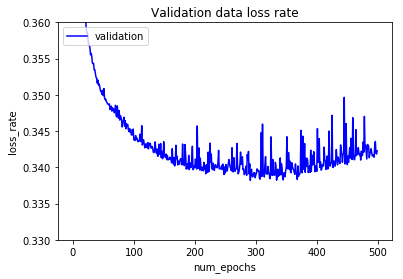

In [165]:

plt.plot(history.history['val_loss'],color="blue")
plt.title('Validation data loss rate')
plt.xlabel('num_epochs')
plt.ylabel('loss_rate')
plt.ylim(0.33,0.36)
plt.legend(['validation'], loc='upper left')
plt.show()

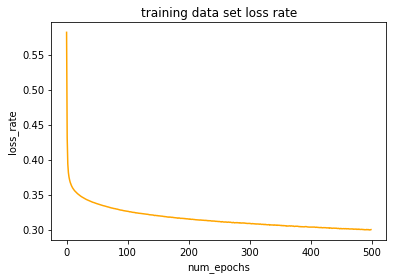

In [164]:
plt.plot(history.history['loss'],color='orange')
plt.title('training data set loss rate')
plt.ylabel('loss_rate')
plt.xlabel('num_epochs')
plt.show()

### conclution about above model

> model training 300 epochs <br>
> but **according to validation data** model is starting to **overfit** <br>
> optimum epoch for training is 300

##### Model Accuraccy

In [257]:
min_loss_index = history.history['val_loss'].index(min(history.history['val_loss']))
max_acc = history.history['acc'][min_loss_index]

print('Accuracy in minimum loss: '+str(max_acc))

Accuracy in minimum loss: 0.8212094326678336


#### Model Precision and recall

In [235]:
y_predict = modelN.predict(x_test)
 # conver one hot encording on to noemal array 
Y_Pred = []
for x in y_predict:
    if x[0]> 0.5:
        Y_Pred.append(0)
    else:
        Y_Pred.append(1)


In [240]:
# cross validation
print(metrics.classification_report(y_test,Y_Pred,digits = 3))

             precision    recall  f1-score   support

          0      0.881     0.921     0.901      3709
          1      0.734     0.636     0.681      1268

avg / total      0.843     0.849     0.845      4977



- precision = TP/(TP+FP) <br>
- recall = TP/(P)<br>
> where TP = "** True Postive**" , FP = "**False Positive**", P = "**total positive**" 

- here high total recall and precision values says that model is predict most of the time correctly
- but this model is over fit to the training data set